In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
from matplotlib import pyplot as plt
import tempfile
import os
import sys
%matplotlib inline
import random

In [2]:
import networkx as nx
import community


In [3]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


/Users/jackiemartinez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


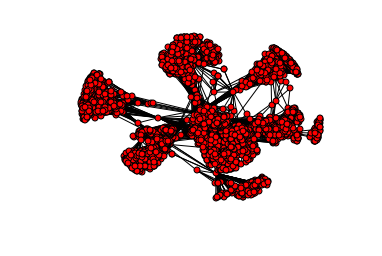

In [6]:
spring_pos = nx.spring_layout(G_fb)
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)


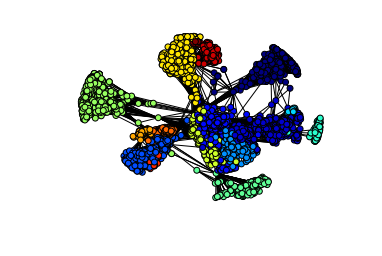

In [7]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)


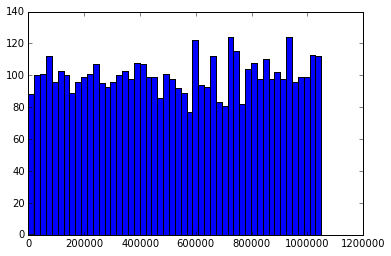

In [13]:
plt.hist(random.sample(xrange(1,df.shape[0]), 5000),bins=50)
plt.show()

In [3]:
df = np.loadtxt("com-dblp.ungraph.txt")
idx = random.sample(xrange(0,df.shape[0]),5000)
idx = (list(set(idx)))
idx.sort()
df_rand10000 = df[idx]
np.savetxt("dblp_rand10000.txt",df_rand10000,fmt="%d")

In [4]:
df_first10000= df[0:1000]
np.savetxt("dblp_first10000.txt",df_first10000,fmt="%d")

Name: 
Type: Graph
Number of nodes: 910
Number of edges: 1000
Average degree:   2.1978


/Users/jackiemartinez/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


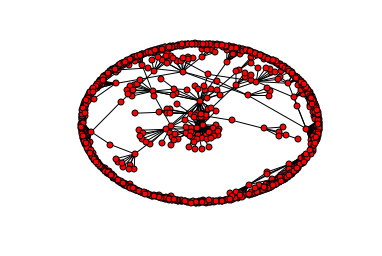

In [5]:
G_dblp_first = nx.read_edgelist("dblp_first10000.txt", create_using = nx.Graph(), nodetype = int)
print nx.info(G_dblp_first)
spring_pos = nx.spring_layout(G_dblp_first)
plt.axis("off")
nx.draw_networkx(G_dblp_first, pos = spring_pos, with_labels = False, node_size = 35)

Name: 
Type: Graph
Number of nodes: 9541
Number of edges: 5000
Average degree:   1.0481


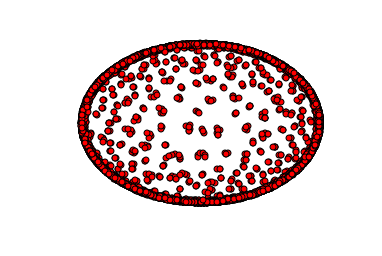

In [6]:
G_dblp_rand = nx.read_edgelist("dblp_rand10000.txt", create_using = nx.Graph(), nodetype = int)
print nx.info(G_dblp_rand)
spring_pos = nx.spring_layout(G_dblp_rand)
plt.axis("off")
nx.draw_networkx(G_dblp_rand, pos = spring_pos, with_labels = False, node_size = 35)


In [102]:
import scipy.stats

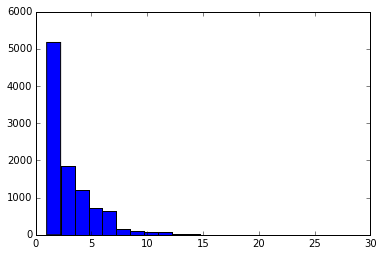

In [130]:
distribution = scipy.stats.expon(loc=1,scale=2)
sample = distribution.rvs(size=10000)
sample = [np.round(elt) for elt in sample]
plt.hist(sample,bins=20)
plt.show()

In [158]:
df_first10000w = np.zeros((10000,3))
df_first10000w[:,:-1] = df_first10000
df_first10000w[:,-1] = sample
np.savetxt("facebook_combined_first10000w.txt",df_first10000w,fmt="%d")

In [160]:
G_fb = nx.read_weighted_edgelist("facebook_combined_first10000w.txt")
#G_fb =nx.read_edgelist('facebook_combined_first10000w.txt',data=(('weight',int),))
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 2002
Number of edges: 10000
Average degree:   9.9900


In [166]:
df_over_two = [(u,v,d) for (u,v,d) in G_fb.edges(data=True) if d['weight'] > 2]
df_under_two = [(u,v,d) for (u,v,d) in G_fb.edges(data=True) if d['weight'] <= 2]

In [169]:
len(df_over_two), len(df_under_two)

(4830, 5170)